# Unsupervised Learning
This notebook uses unsupervised learning models like K-Means and Hierarchical Clustering to discover patterns within the data.

## 1. Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import linkage, dendrogram

## 2. Loading the feature selected dataset

In [2]:
df = pd.read_csv("../data/selected_feature_heart_disease.csv")

X = df.drop("target", axis=1)
y = df["target"]

## 3. Applying K-Means Clustering

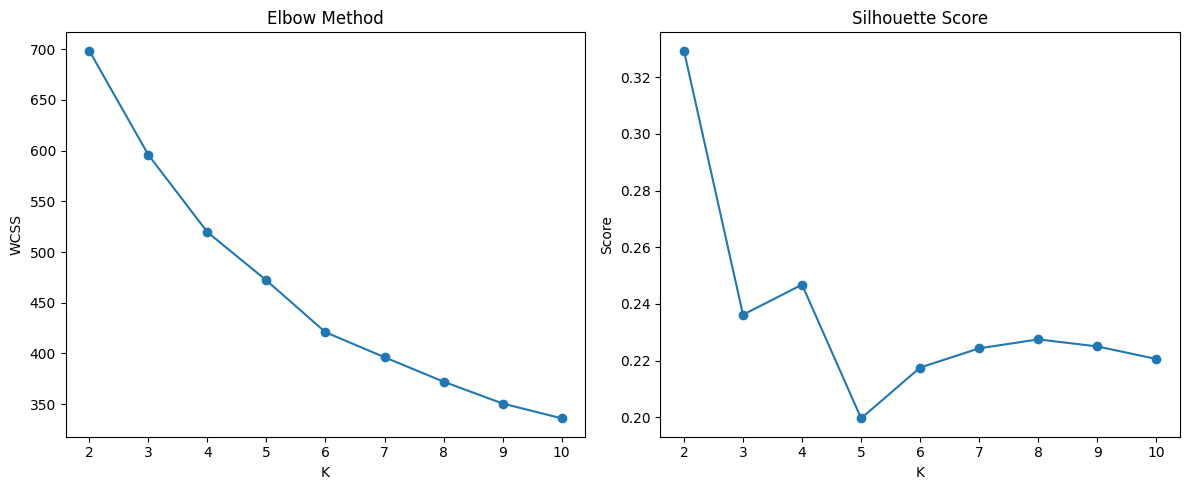

Best K by Silhouette: 2
ARI: 0.3368069640762667
Cluster       0   1
True Label         
0           152   8
1            54  83


In [3]:
k = range(2, 11)
wcs, silhouette = [], []

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit_predict(X)
    wcs.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(12,5))

# Plot for elbow Method
plt.subplot(1,2,1)
plt.plot(k, wcs, marker="o")
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("WCSS")

# Plot for Silhouette Score
plt.subplot(1,2,2)
plt.plot(k, silhouette, marker="o")
plt.title("Silhouette Score")
plt.xlabel("K")
plt.ylabel("Score")
plt.tight_layout() 
plt.show()

best_k = k[np.argmax(silhouette)]
print("Best K by Silhouette:", best_k)

kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit_predict(X)

print("ARI:", adjusted_rand_score(y, kmeans.labels_))
print(pd.crosstab(y, kmeans.labels_, rownames=["True Label"], colnames=["Cluster"]))


## 4. Performing Hierarchical Clustering

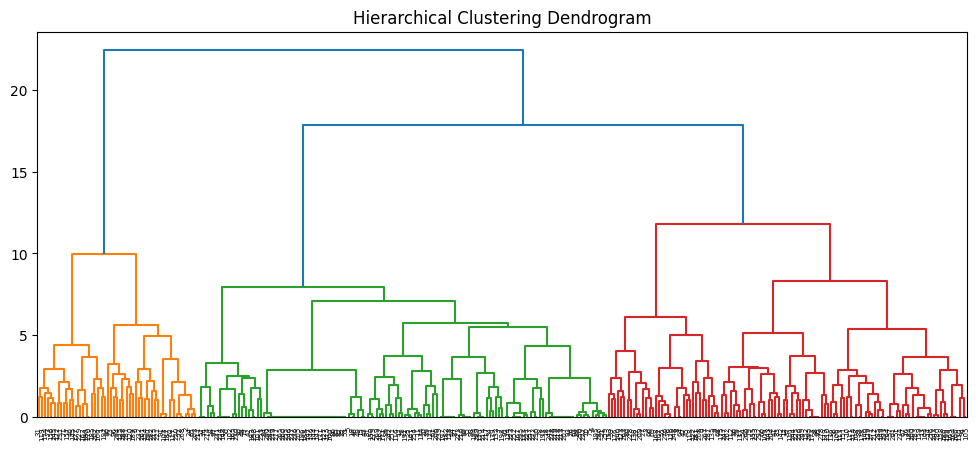

ARI: 0.11165201863878882
Cluster       0   1
True Label         
0           154   6
1            92  45


In [4]:
linked = linkage(X, method="ward")
plt.figure(figsize=(12,5))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

hc = AgglomerativeClustering(n_clusters=best_k, linkage="ward")
hc.fit_predict(X)

print("ARI:", adjusted_rand_score(y, hc.labels_))
print(pd.crosstab(y, hc.labels_, rownames=["True Label"], colnames=["Cluster"]))